# MALL CUSTOMERS:
#### This dataset is from Udemy's Machine Learning A-Z course. As owner of the mall the purpose is to understand the customers who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [7]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [8]:
data = pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# checking if there is any NULL data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# STEPS INVOLVED IN CLUSTERING:
## 1) Data Visualization 
## 2) Clustering analysis
## 3) Algorithm 1
## 4) Algorithm 2

# DATA VISUALIZATION

Text(0.5, 1.0, 'Andrew Curves for Gender')

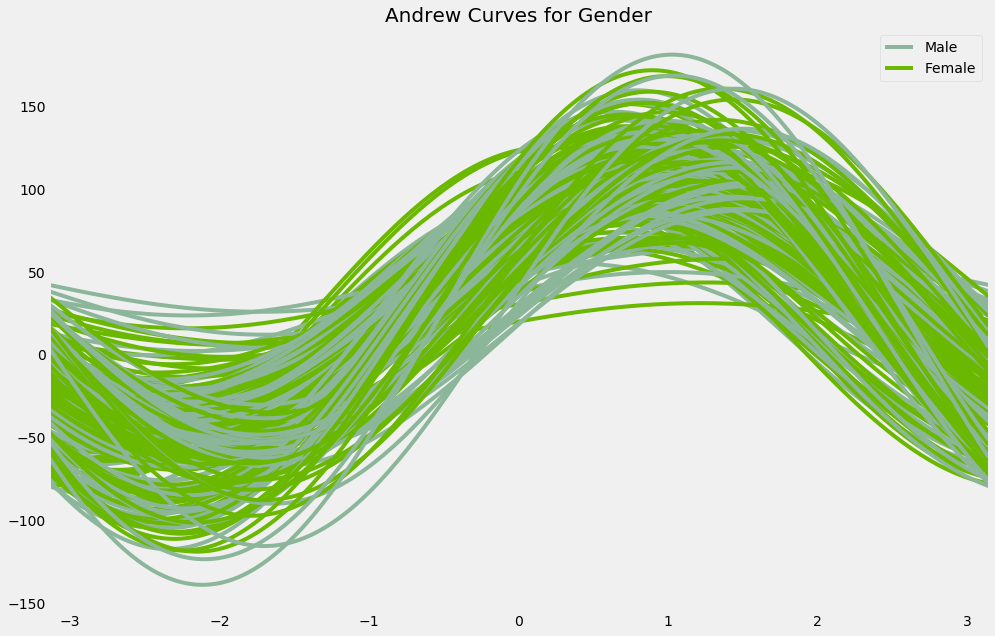

In [10]:
plt.rcParams['figure.figsize'] = (15, 10) 
plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)

#It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances.
#Which means that Andrews curves that are represented by functions close together suggest that the 
#corresponding data points will also be close together

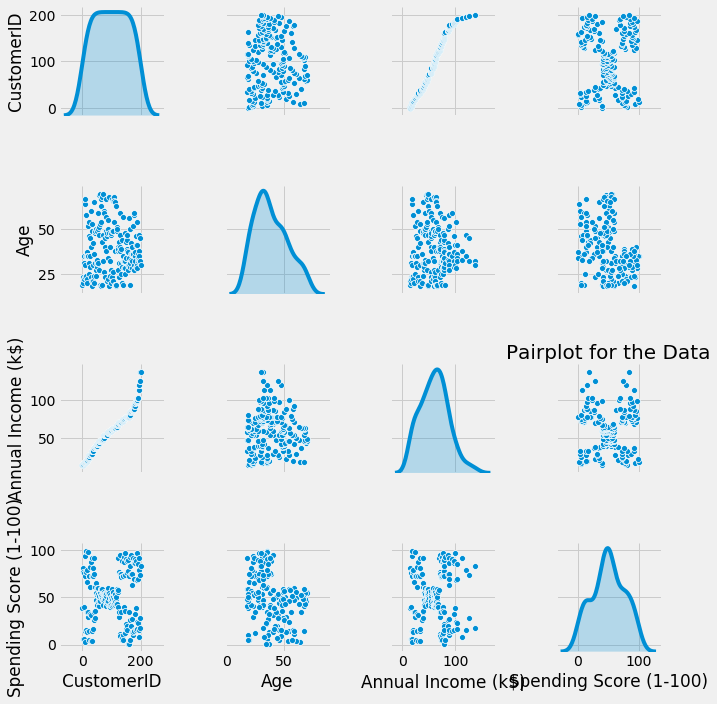

In [11]:
sns.pairplot(data, diag_kind='kde')
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

Text(0.5, 1, 'Heatmap for the Data')

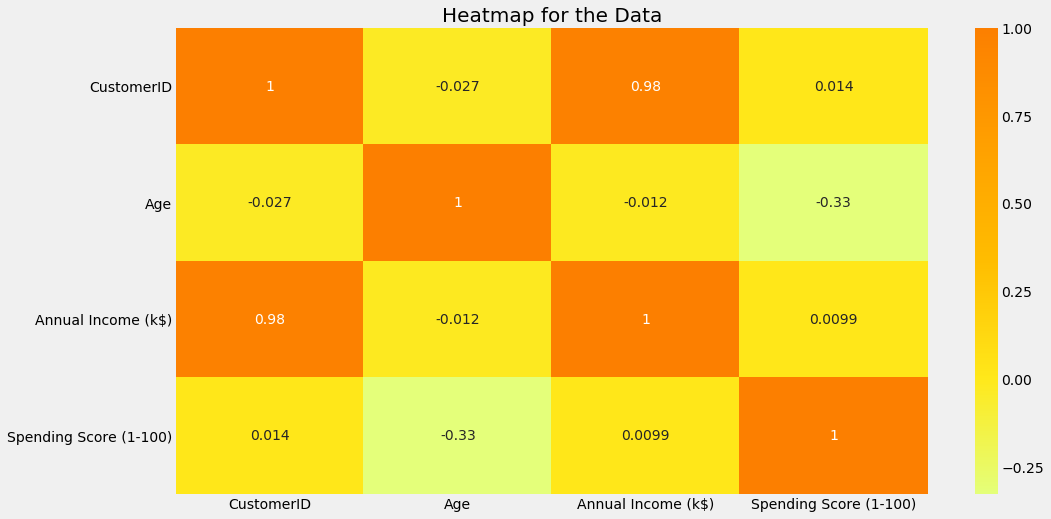

In [12]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)

# The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset,
# This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

# We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of
# the features.

Text(0.5, 1.0, 'Distribution of Age')

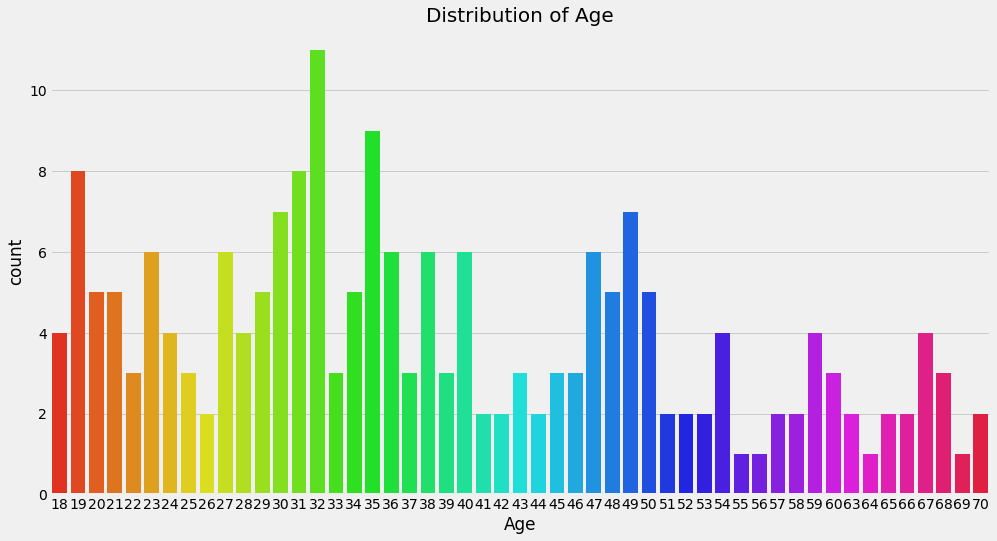

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)

# This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the 
# Visitor's Age Group in the Mall.

# By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear 
# pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. 
# Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are 
# very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

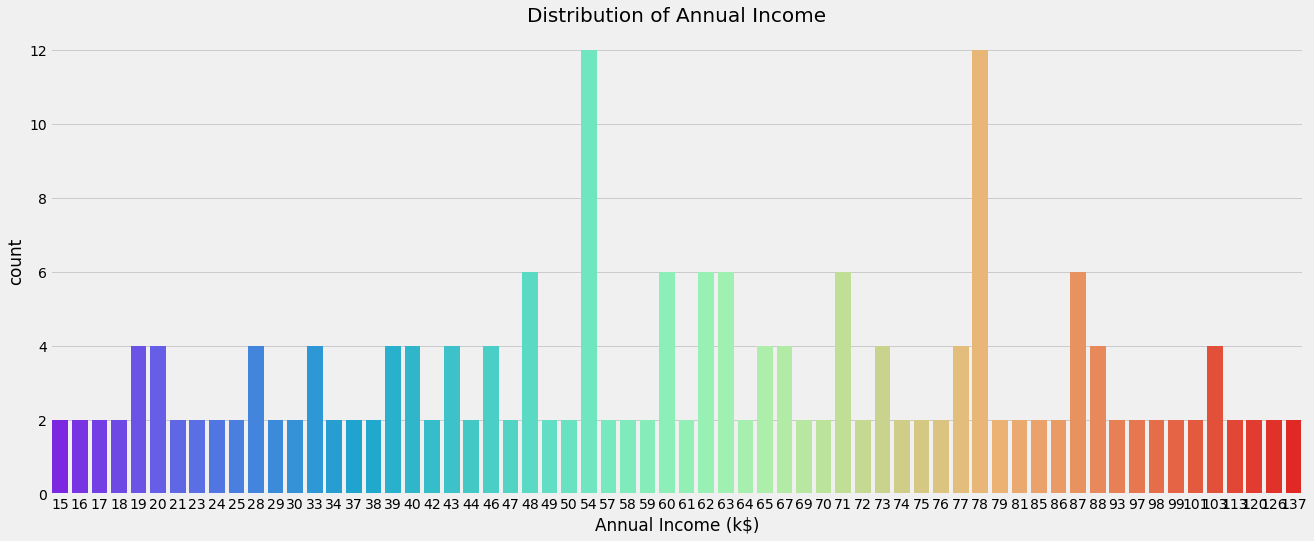

In [14]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

# Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers 
# in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. 
# There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

Text(0.5, 1.0, 'Distribution of Spending Score')

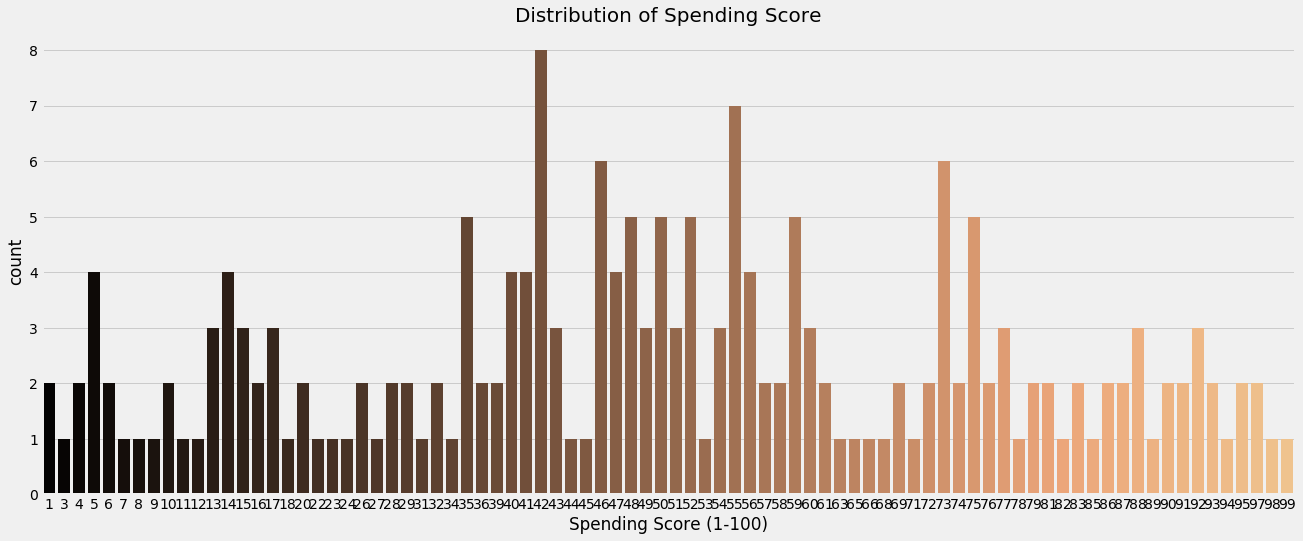

In [15]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)

# This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about 
# the Spending Score of the Customers Visiting the Mall.

# On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting 
# there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the 
# variety of Customers with Varying needs and requirements available in the Mall.

Text(0.5, 1.0, 'Gender vs Spending Score')

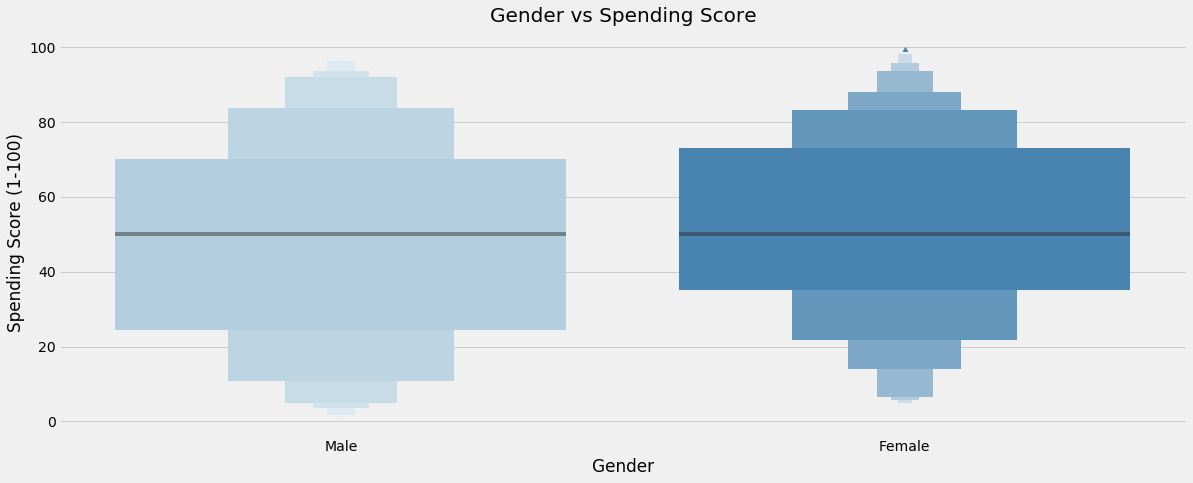

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)

# Bi-variate Analysis between Gender and Spending Score.

# It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas 
# the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women 
# are Shopping Leaders.

Text(0.5, 1.0, 'Gender vs Annual Income')

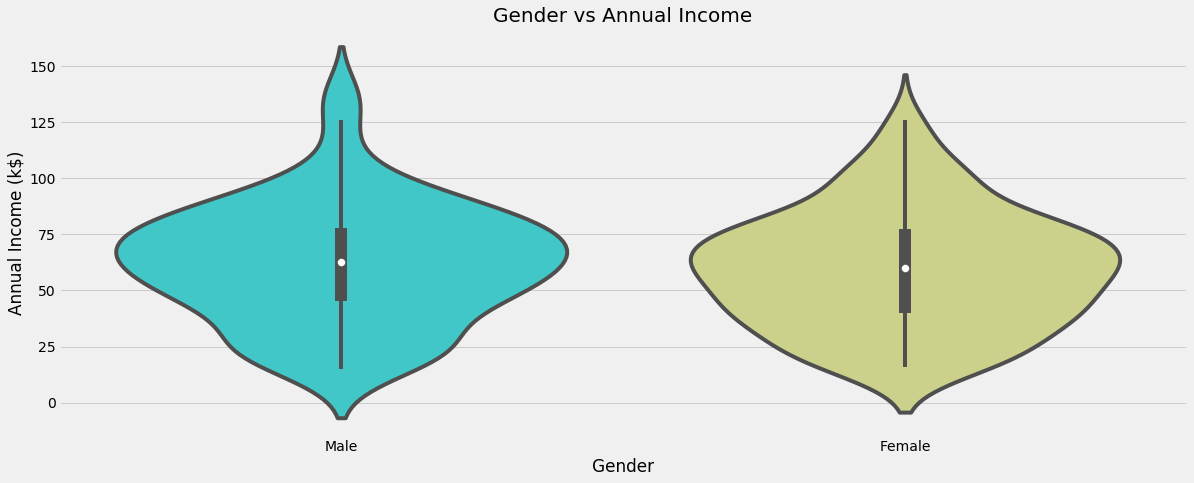

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)

# Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

# There are more number of males who get paid more than females. But, The number of males and females are equal in number
# when it comes to low annual income.

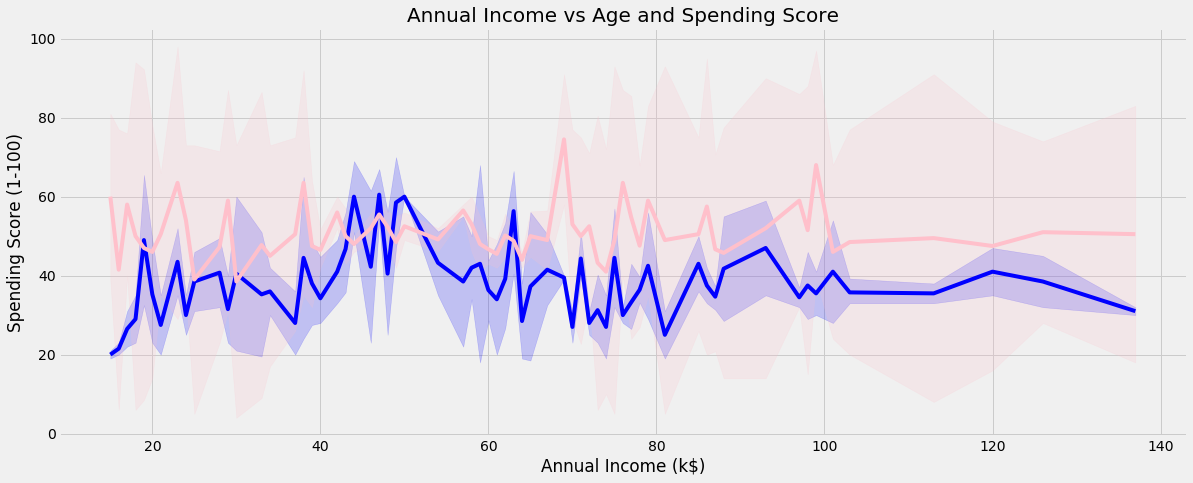

In [18]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

# The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the
# Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

# CLUSTER ANALYSIS

## K-Means : Finding the optimum number of clusters

In [19]:
x = data.iloc[:, [3, 4]].values
x.shape

(200, 2)

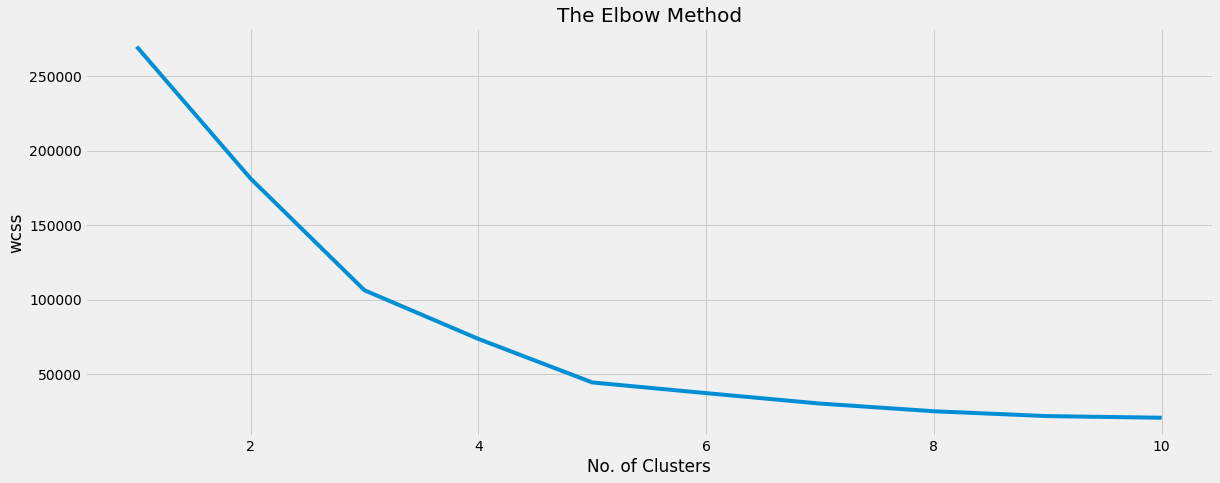

In [20]:
#The Elbow Method to find the No. of Optimal Clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

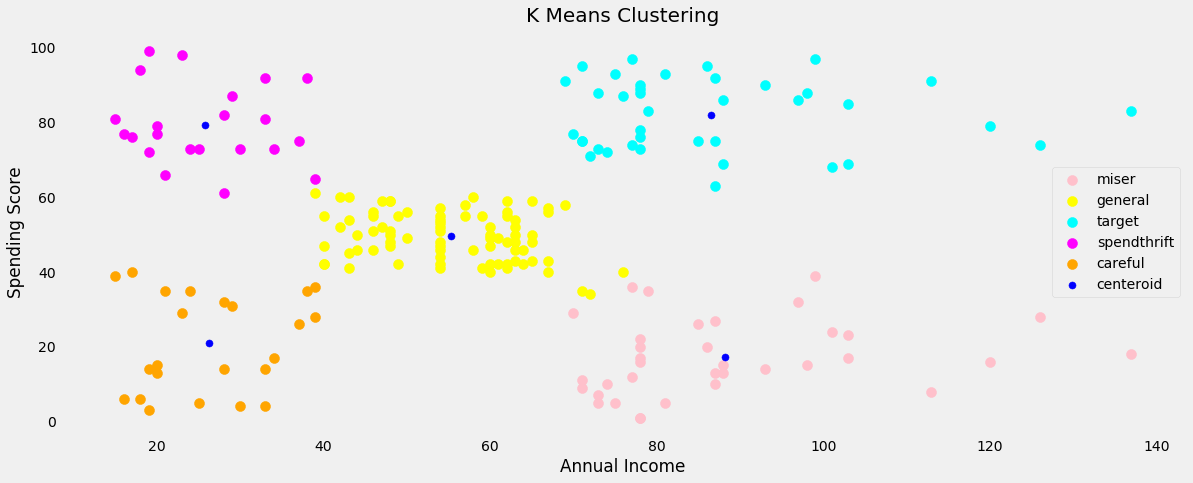

In [21]:
# number of clusters = 5

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## Hierarchial Clustering : Using Dendrograms to find the no. of Optimal Clusters

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

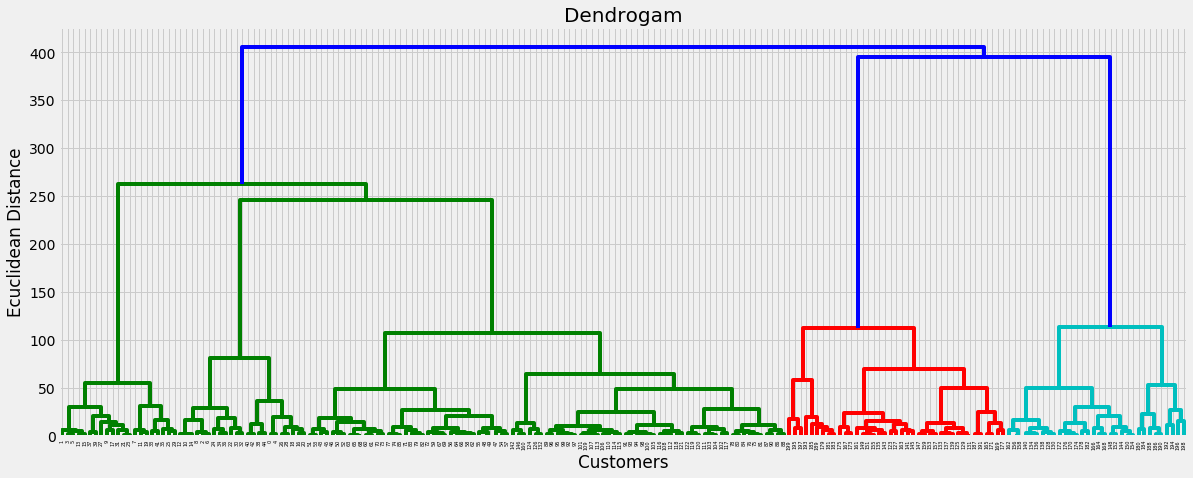

In [22]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

#number of optimum clusters = 5

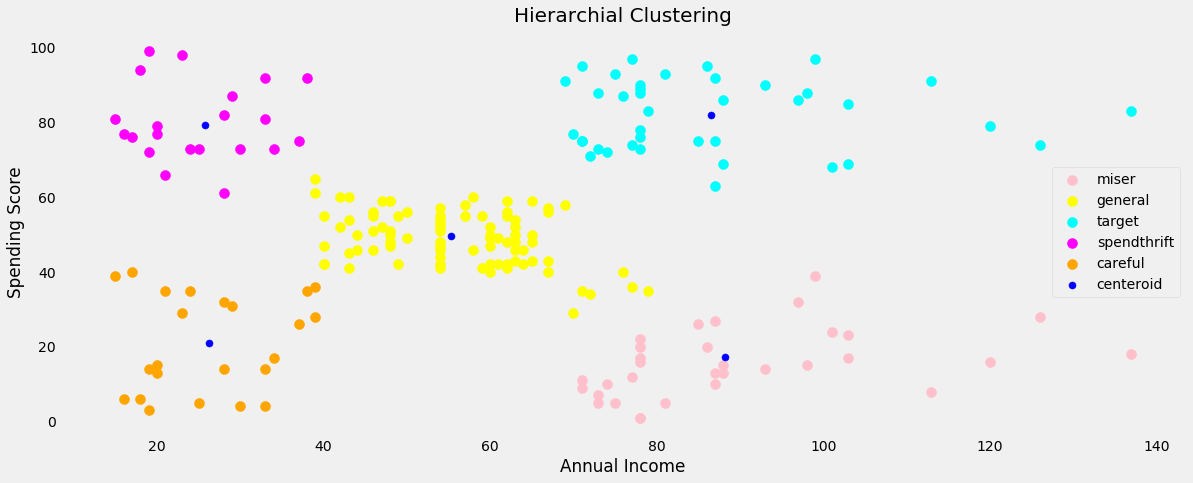

In [23]:
 from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Clusters of Customers Based on their Ages:


## K-Means Algorithm:


In [24]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

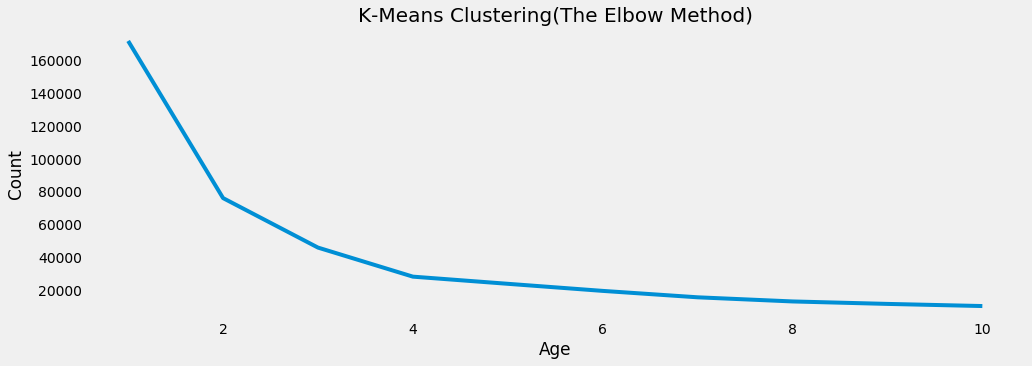

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

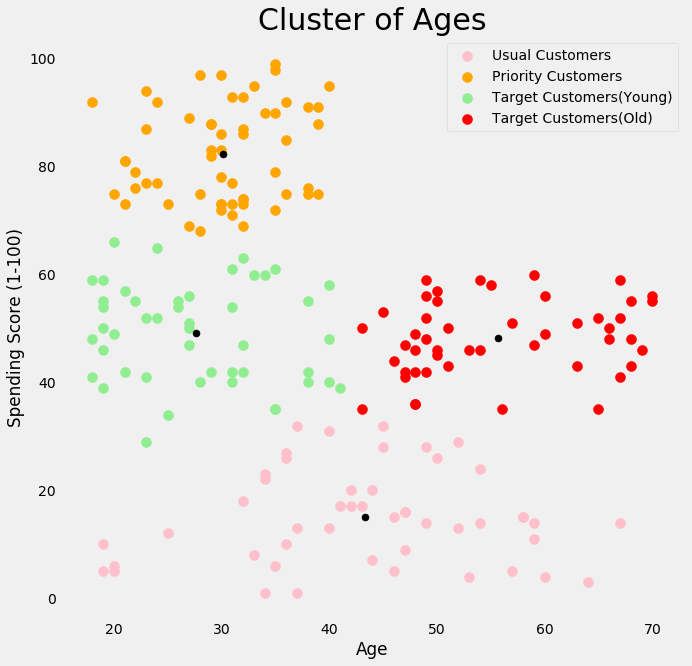

In [26]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()




According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.